In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import IPython.display

In [2]:
frequency, wave = wavfile.read("agua.wav")

In [3]:
wave

array([   0,    0,    0, ..., -243, -329, -369], dtype=int16)

In [4]:
frequency

16000

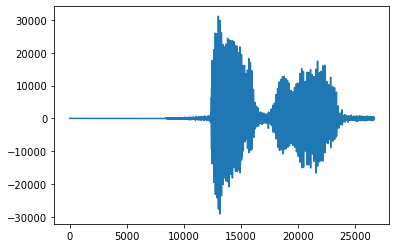

In [5]:
plt.plot(wave)

(129, 118)

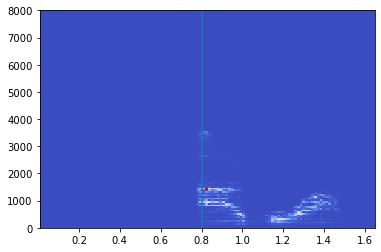

In [6]:
frequencies, time, spectrogram = signal.spectrogram(wave, frequency)
cmap=get_cmap("coolwarm")
plt.pcolormesh(time, frequencies, spectrogram,cmap=cmap)
plt.axvline(0.8)
spectrogram.shape

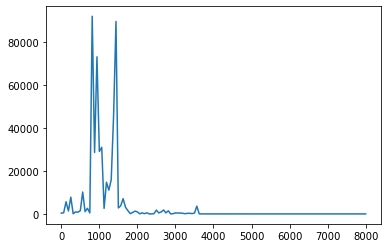

In [7]:
plt.plot(frequencies, spectrogram.T[60])

In [8]:
preemphasis_wave = np.append(wave[0], wave[1:]- 0.95*wave[:-1])

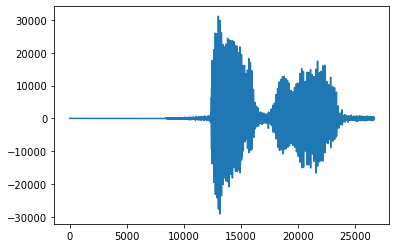

In [9]:
plt.plot(wave)

(129, 118)

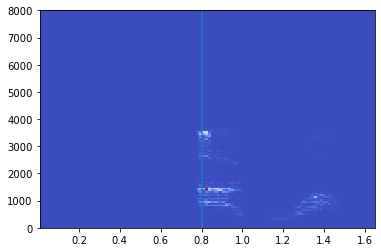

In [10]:
frequencies_preemphasis, time_preemphasis, spectrogram_preemphasis = signal.spectrogram(preemphasis_wave, frequency)
cmap=get_cmap("coolwarm")
plt.pcolormesh(time_preemphasis, frequencies_preemphasis, spectrogram_preemphasis,cmap=cmap)
plt.axvline(0.8)
spectrogram.shape

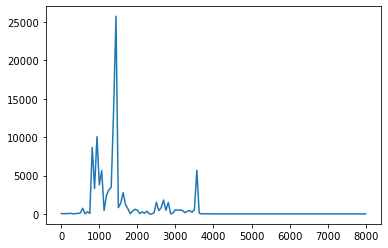

In [11]:
plt.plot(frequencies_preemphasis, spectrogram_preemphasis.T[60])

In [12]:
IPython.display.Audio(preemphasis_wave, rate=frequency)

In [13]:
plt.rcParams["figure.figsize"] = (12, 6)

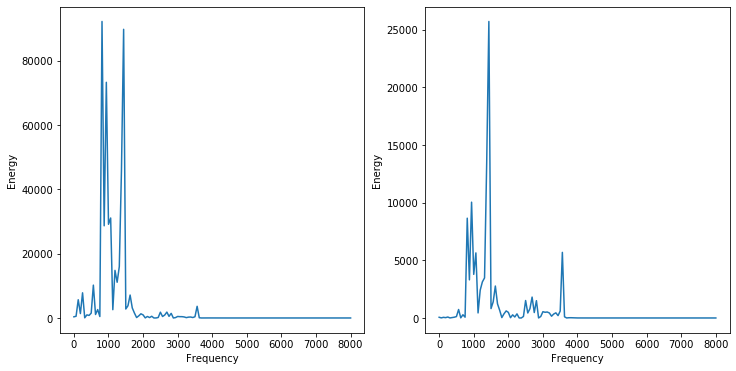

In [14]:
plt.subplot(121)
plt.plot(frequencies, spectrogram.T[60])
plt.xlabel('Frequency')
plt.ylabel('Energy')

# Plot the spectrogram
plt.subplot(122)
plt.plot(frequencies_preemphasis, spectrogram_preemphasis.T[60])
plt.xlabel('Frequency')
plt.ylabel('Energy')

plt.savefig("original_preenphasis.png")

In [15]:
A440_freq, A440 = wavfile.read("A_440.wav")

<ipython-input-15-116530645564>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  A440_freq, A440 = wavfile.read("A_440.wav")


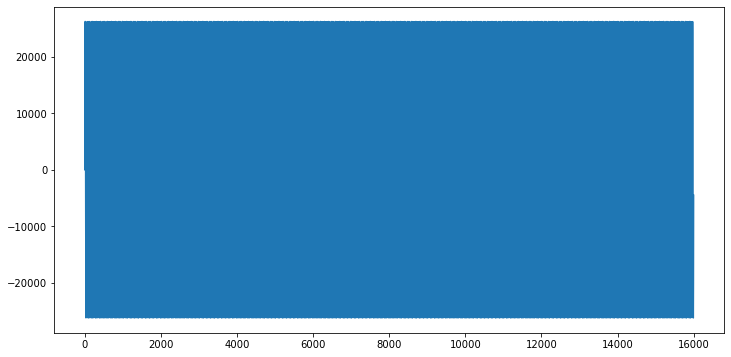

In [16]:
plt.plot(A440)

In [17]:
IPython.display.Audio(A440, rate=A440_freq)

In [18]:
A440.shape

(16000,)

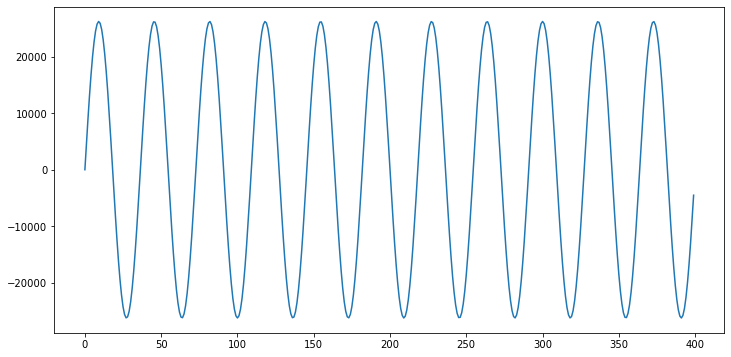

In [19]:
frame_size = int(A440_freq*0.025)
frame = A440[:frame_size]
plt.plot(frame)

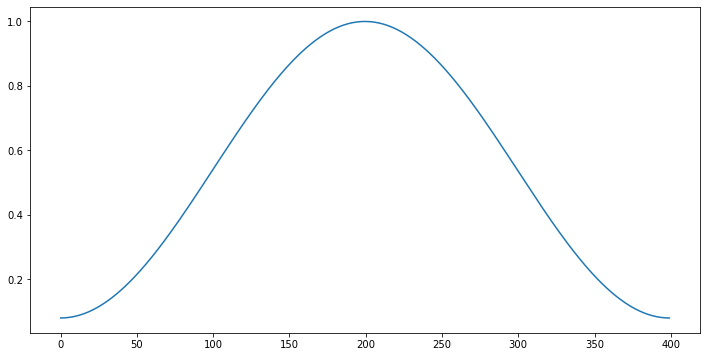

In [20]:
window =signal.windows.hamming(frame_size)
plt.plot(window)

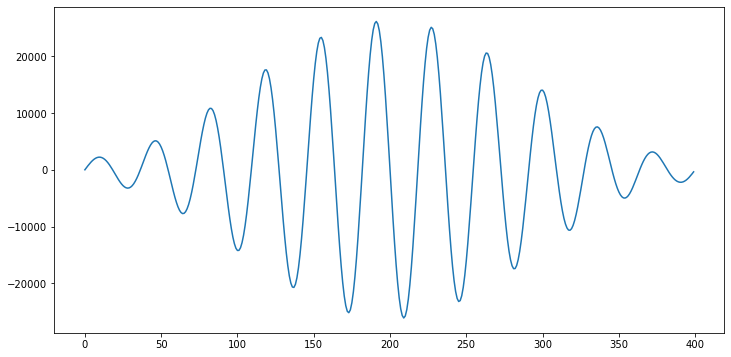

In [21]:
windowed_frame = frame*window
plt.plot(windowed_frame)
plt.savefig("windowd_frame.png")

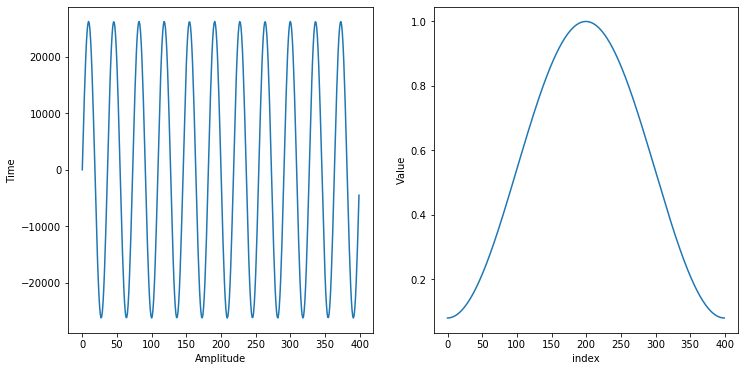

In [22]:
plt.subplot(121)
plt.plot(frame)
plt.xlabel('Amplitude')
plt.ylabel('Time')

# Plot the spectrogram
plt.subplot(122)
plt.plot(window)
plt.xlabel('index')
plt.ylabel('Value')

plt.savefig("window_signals.png")

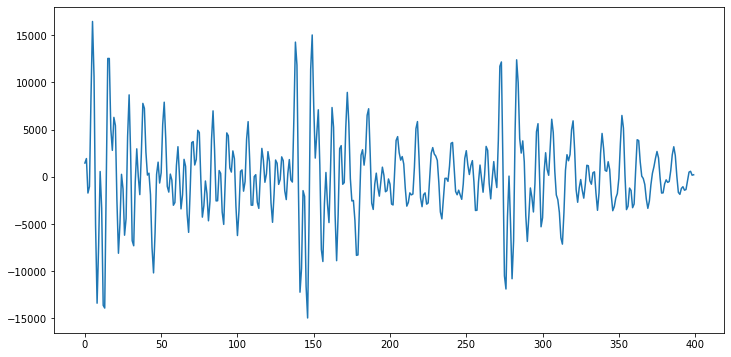

In [23]:
frame_real_wave = preemphasis_wave[13000:13000+frame_size]
frame_real_wave.shape
plt.plot(frame_real_wave)

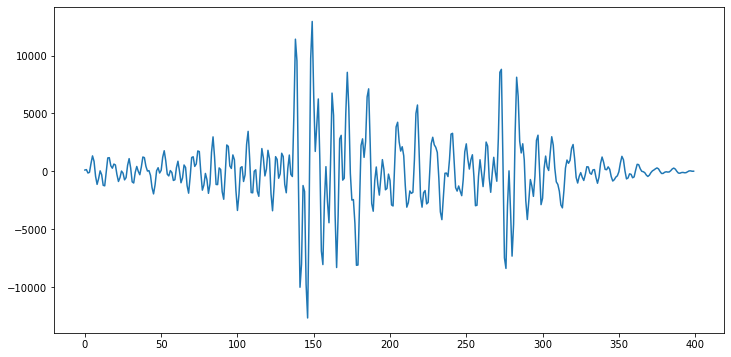

In [24]:
windowed_real_frame = frame_real_wave*window
plt.plot(windowed_real_frame)

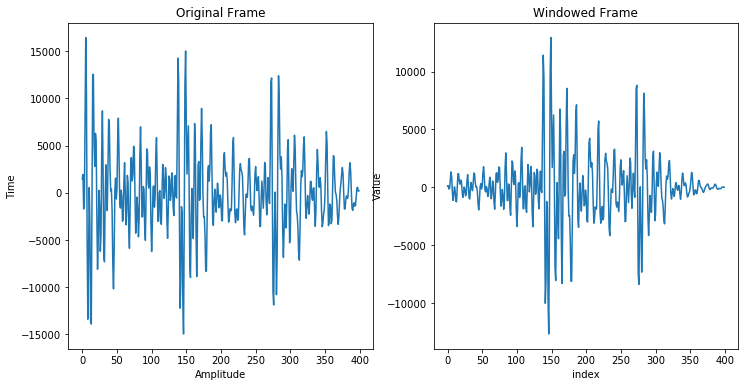

In [25]:
ax_1 = plt.subplot(121)
ax_1.set_title("Original Frame")
plt.plot(frame_real_wave)
plt.xlabel('Amplitude')
plt.ylabel('Time')

# Plot the spectrogram
ax_2 = plt.subplot(122)
ax_2.set_title("Windowed Frame")
plt.plot(windowed_real_frame)
plt.xlabel('index')
plt.ylabel('Value')

plt.savefig("window_signals_real_audio.png")

In [26]:
windowed_real_frame.dtype

dtype('float64')

In [27]:
regular_fft = np.fft.fft(windowed_real_frame)

In [29]:
real_fft = np.fft.rfft(windowed_real_frame)

In [31]:
np.fft.rfft(windowed_real_frame).shape

(201,)

In [32]:
regular_fft.shape

(400,)

In [33]:
hz_to_mel = lambda f: 1127 * np.log(1+f/700)
mel_to_hz = lambda m: 700 * (np.e**(m/1127) -1)

In [34]:
lower_mel_frequency = 0
highest_mel_frequency = hz_to_mel(frequency/2)
highest_mel_frequency

2840.0377117383778

In [35]:
number_of_filters = 40
mel_points = np.linspace(lower_mel_frequency, highest_mel_frequency, number_of_filters + 2)
mel_points

array([   0.        ,   69.26921248,  138.53842496,  207.80763744,
        277.07684993,  346.34606241,  415.61527489,  484.88448737,
        554.15369985,  623.42291233,  692.69212481,  761.9613373 ,
        831.23054978,  900.49976226,  969.76897474, 1039.03818722,
       1108.3073997 , 1177.57661218, 1246.84582467, 1316.11503715,
       1385.38424963, 1454.65346211, 1523.92267459, 1593.19188707,
       1662.46109955, 1731.73031204, 1800.99952452, 1870.268737  ,
       1939.53794948, 2008.80716196, 2078.07637444, 2147.34558692,
       2216.61479941, 2285.88401189, 2355.15322437, 2424.42243685,
       2493.69164933, 2562.96086181, 2632.23007429, 2701.49928678,
       2770.76849926, 2840.03771174])

In [36]:
hz_points = mel_to_hz(mel_points)
hz_points

array([   0.        ,   44.37407701,   91.56109503,  141.73937073,
        195.09852453,  251.84019719,  312.17881177,  376.34238398,
        444.57338374,  517.12965156,  594.28537283,  676.33211398,
        763.57992429,  856.35850754,  955.01846792, 1059.93263499,
       1171.49747253, 1290.13457677, 1416.29226959, 1550.44729265,
       1693.10660904, 1844.80931898, 2006.12869712, 2177.67435884,
       2360.094564  , 2554.07866662, 2760.35971998, 2979.71724669,
       3212.98018452, 3461.03001887, 3724.80411386, 4005.29925458,
       4303.57541383, 4620.75975774, 4958.05090523, 5316.72345751,
       5698.13281472, 6103.72029792, 6535.01859571, 6993.65755619,
       7481.37034603, 8000.        ])

In [37]:
nfft = regular_fft.shape[0]

In [38]:
b = np.floor(nfft*hz_points/frequency )
b

array([  0.,   1.,   2.,   3.,   4.,   6.,   7.,   9.,  11.,  12.,  14.,
        16.,  19.,  21.,  23.,  26.,  29.,  32.,  35.,  38.,  42.,  46.,
        50.,  54.,  59.,  63.,  69.,  74.,  80.,  86.,  93., 100., 107.,
       115., 123., 132., 142., 152., 163., 174., 187., 199.])

In [64]:
fbank = np.zeros([number_of_filters, nfft])
fbank.shape

(40, 400)

In [65]:
for i in range(0, number_of_filters):
    for j in range(int(b[i]), int(b[i+1])):
        fbank[i,j] = (j-b[i]) / (b[i+1] - b[i])
    for j in range(int(b[i+1]), int(b[i+2])):
        fbank[i,j] = (b[i+2] - j) / (b[i+2] - b[i+1])
fbank

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

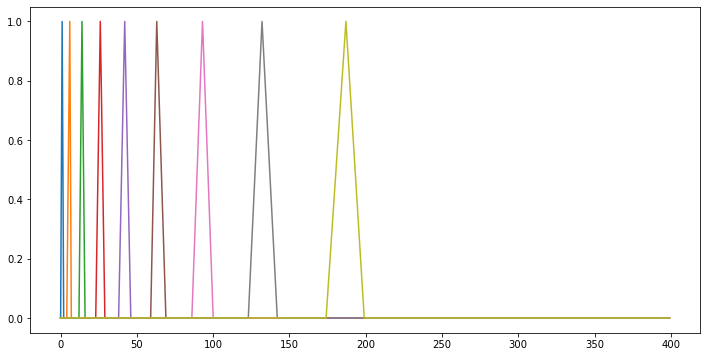

In [67]:
plt.plot(fbank[0])
plt.plot(fbank[4])
plt.plot(fbank[9])
plt.plot(fbank[14])
plt.plot(fbank[19])
plt.plot(fbank[24])
plt.plot(fbank[29])
plt.plot(fbank[34])
plt.plot(fbank[39])
plt.savefig("filterbanks.png")

In [42]:
mel_spectrum_features = np.dot(regular_fft, fbank.T)

In [43]:
mel_spectrum_features

array([   544.31291026-5.93645059e+00j,  -2389.53631176-5.06609804e+01j,
         4842.88425072+2.59296701e+02j,  -4568.28456701+2.69494083e+02j,
        12183.53141189-5.25697924e+02j,  -8992.9955847 -2.49897761e+02j,
         5526.39207316+3.44719938e+03j,  -6242.6429297 -2.32205022e+02j,
         9209.21572255+2.93762496e+02j,  -4840.00997078-2.24591175e+03j,
         6127.25508793-1.32464072e+02j, -26886.356971  -1.07785625e+04j,
        80014.71681577+3.27859653e+04j, -19265.52155706-3.28122399e+04j,
        10139.31278902-1.46369123e+04j,  -4548.43112992-1.55478356e+04j,
        -3642.53172172-2.41219387e+04j,  -7909.72205646-2.41418387e+03j,
       -39296.48154657+1.39769968e+04j,  -1921.92357668+1.47206282e+04j,
        -9068.95982995+2.90051018e+03j,   3196.52013681+8.25737406e+02j,
        -8325.03769196+7.39751920e+03j,   6121.19868219-1.20552376e+03j,
       -21557.33350707+1.89906531e+04j,  20043.36782338+3.46214500e+04j,
        12003.72995462+1.39121578e+03j,  19999.6812

In [44]:
log_mel_spectrum_features = np.log(mel_spectrum_features)
log_mel_spectrum_features

array([ 6.29958375-0.01090589j,  7.77907931-3.12039465j,
        8.48669705+0.05349072j,  8.42863008+3.08266854j,
        9.40877045-0.04312149j,  9.10458722-3.11381176j,
        8.78161467+0.55771457j,  8.73985023-3.10441321j,
        9.12846848+0.03188794j,  8.5821775 -2.7071325j ,
        8.72073578-0.02161546j, 10.27389257-2.76031636j,
       11.36756709+0.3888825j , 10.54665668-2.10170952j,
        9.78727693-0.96497157j,  9.69273493-1.8553991j ,
       10.10215022-1.72066895j,  9.02038311-2.84535626j,
       10.63845187+2.79986614j,  9.60545619+1.70062187j,
        9.16130784+2.83204545j,  8.10211756+0.25279741j,
        9.31801517+2.41511905j,  8.73853974-0.19445387j,
       10.26566725+2.41940997j, 10.5967539 +1.04601417j,
        9.39964425+0.11538383j,  9.9034836 -0.00489608j,
       10.92398196-0.70321988j, 10.31260393-2.6505636j ,
        8.28897678-2.65475786j,  7.98093158-2.60031399j,
        7.63523706-2.68135884j,  7.18817039-2.57679403j,
        7.01118669-2.56819755j,

In [45]:
from scipy import fftpack

In [46]:
mfcc = fftpack.dct(log_mel_spectrum_features,norm='ortho')
np.absolute(mfcc)

array([5.59112811e+01, 4.15597348e+00, 8.33037549e+00, 4.47609633e+00,
       4.63135556e+00, 2.78525143e+00, 1.60781767e+00, 2.07864969e+00,
       1.00246138e+00, 7.47408488e-01, 3.34422417e+00, 1.80976667e+00,
       7.34740950e-01, 9.10815291e-01, 2.00734828e+00, 1.99904677e+00,
       4.38798786e-01, 1.06175642e+00, 7.47213578e-01, 6.65737279e-01,
       1.67298210e+00, 1.82316310e+00, 1.63310698e+00, 1.71743705e+00,
       1.34499235e+00, 2.68654507e+00, 2.44847466e+00, 6.04132258e-01,
       5.01264106e-02, 4.60667442e-01, 2.52165651e-01, 7.53276813e-02,
       2.71180004e-01, 1.42167280e+00, 1.27248941e+00, 7.78580586e-01,
       6.59144898e-01, 6.09322244e-01, 2.47001801e+00, 4.32377414e+00])

In [47]:

mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

NameError: name 'numpy' is not defined

In [50]:
np.absolute(1+2j)

2.23606797749979

In [80]:
np.dot(
    np.fft.ifft(
        np.log(
            np.absolute(
                np.fft.fft(
                    frame_real_wave*window
                )
            )
        )
    ), 
    fbank.T
)

(40,)